# Assignment 1

## 1 Histogram Calculation

### Julia function `myhistogram`

In [1]:
using Images, Colors

"""
myhistogram(img)
Takes the grayscale image `img` and returns its histogram.
# Arguments
- `img::Array{T,2}`: 2D array representing a grayscale image
in range [0, 1]
"""

function myhistogram(img) 
    if typeof(img) == Matrix{Gray{N0f8}}
        imgArray = channelview(float.(img))
        # vector of length 256
        histogram = zeros(Int64, 256)
        
        for pixel in eachindex(imgArray)
            quantisation = Int(imgArray[pixel]÷(1/256) +1)
            histogram[quantisation] +=1;
        end
    end
    return histogram./(size(imgArray,1) * size(imgArray,2))
end

myhistogram (generic function with 1 method)

### Loading images and calculate histogram for each image

In [2]:
using FileIO

fruitA = load("fruitA.png");
fruitB = load("fruitB.png");

histA = myhistogram(fruitA);
histB = myhistogram(fruitB);

### Plot images and histogram

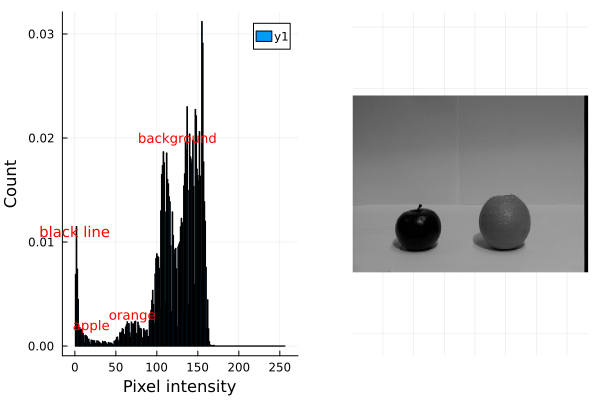

In [3]:
using Plots

p1 = plot(histA, seriestype=:bar, xlabel="Pixel intensity", ylabel="Count")
annotate!(0, 0.011, ("black line", 10, :red))
annotate!(20, 0.002, ("apple", 9, :red))
annotate!(70, 0.003, ("orange", 9, :red))
annotate!(125, 0.02, ("background", 9, :red))
p2 = plot(fruitA[end:-1:1, :], yflip = false, showaxis = false)

plot(p1, p2, layout=(1,2))

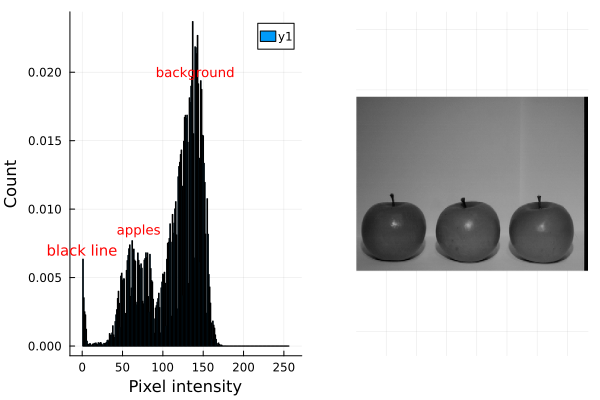

In [4]:
p1 = plot(histB, seriestype=:bar, xlabel="Pixel intensity", ylabel="Count")
annotate!(0, 0.007, ("black line", 10, :red))
annotate!(70, 0.0085, ("apples", 9, :red))
annotate!(140, 0.02, ("background", 9, :red))
p2 = plot(fruitB[end:-1:1, :], yflip = false, showaxis = false)

plot(p1, p2, layout=(1,2))

### profile of intensities 

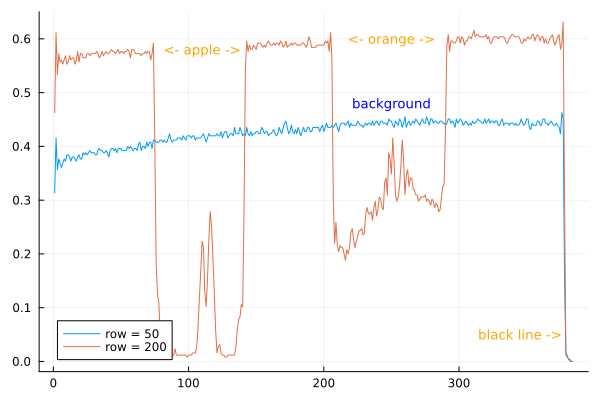

In [5]:
function intensityProfile(img, row)
    imgArray = channelview(float.(img))
    profile = imgArray[row,:]
    #profile = Int.(imgArray[row,:].÷(1/256)) quantisiert
    return profile
end

plot(intensityProfile(fruitA, 50), label="row = 50")
plot!(intensityProfile(fruitA, 200), label="row = 200")
annotate!(110, 0.58, ("<- apple ->", 9, :orange))
annotate!(250, 0.6, ("<- orange ->", 9, :orange))
annotate!(345, 0.05, ("black line ->", 9, :orange))
annotate!(250, 0.48, ("background", 9, :blue))